In [36]:
from IPython.core.display import HTML
HTML(r"""
<style>
    * {
        font-family: SaxMono, Consolas, monospace; 
        font-size: 16px !important;
        text-align: justify !important;
        line-height: 1.1 !important;
    }
    .output-plaintext, .output-stream, .output {
        font-family: SaxMono, Consolas, monospace; 
        line-height: 1.3 !important;
        font-size: 12px !important;
    }
</style>
""")

# DL00 - Classification

Author  : Felipe Camargo de Pauli  
Email   : fcdpauli@gmail.com  
Date    : March 2024  

This is the first program used to classify the data.

We are going to create a simple example of a neural network to classify the data. We are using the breast cancer dataset from sklearn. The dataset has 30 features and 1 target. The target is binary, 0 (cancer) or 1 (non-cancer).

For every deep learning problem, we need the following steps:

**1.  An Architecture**
> Our architecture will have:
> - One input layer with 30 neurons (the number of features)
> - One hidden layer with 15 neurons (half of the input layer)
> - One output layer with 1 neuron  (the target)

**2. A Loss Function (our error to feel the gradient)**
> We are going to use the binary cross-entropy loss function.

**3. An Optimizer (our gradient descent)**
> We are going to use the Adam optimizer.

**4. An activation function (our non-linearity)**
> We are going to use the ReLU activation function for the hidden layer and the sigmoid activation function for the output layer.
> - Relu: f(x) = max(0, x)
> - Sigmoid: f(x) = 1 / (1 + exp(-x))  

> The ReLU function is used to introduce non-linearity. That's because the linear combination of linear functions is still a linear function, and we need non-linearity to solve complex problems.
> The sigmoid function is used to transform the output to a probability.


## Checking the GPU environment

In [37]:
# Load the Tensorflow notebook extension and print its version
import tensorflow as tf
print("TF version:", tf.__version__)
!nvidia-smi
!ls /usr/local/cuda -l

TF version: 2.15.0


Fri Apr  5 15:05:41 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.65                 Driver Version: 551.86         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    On  |   00000000:01:00.0  On |                  N/A |
| N/A   55C    P5              5W /   82W |    5406MiB /   6144MiB |     27%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

As we can see, we got the Tensorflow 2.15.0 and the CUDA 12.2. The GPU used is the NVIDIA GeForce RTX 3050.

Ok! It seems that everything is working fine. Let's start the code.

## Loading and analyzing the data

In [38]:
# Load the data from sklearn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(type(data))

<class 'sklearn.utils._bunch.Bunch'>


Well. The data is a **bunch of data**, a Scikit-Learn structure. Let's analyse a bit the data. 

In [39]:
# Let's look at the Description of the dataset!
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Ok. We have here features about the breast cancer. Data about the cancer spots associated with a target, 0 or 1. The data is already normalized. Let's check the data.

In [40]:
# First of all, the keys!
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [41]:
data["data"].shape

(569, 30)

In [42]:
data["target"].shape

(569,)

In [43]:
data["target_names"]

array(['malignant', 'benign'], dtype='<U9')

Great! We have here a lot of things. The most important are:
- The data, which is a numpy array with 569 samples and 30 features.
- The target, which is a numpy array with 569 samples and 1 target.
- The target names, which are the classes malignant and benign (0 and 1, respectively).
- The feature names, which are the names of the features.

In [44]:
# Using the method values, we get all the values of the dictionary
data.values()

dict_values([array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       

In [45]:
# But let's see only elements of the data
data["data"]

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

Ok. They are numbers =). Let's check the data of one sample. First, let's check the feature names.

In [46]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [47]:
# Let's see an example of the data
# data.data is the list of samples. Each sample is a list of features.
# data.target is the list of labels. Each label is an integer.
# To get the Mean Radius, Mean Texture and the Target of the first sample, we can do:
print("Mean Radius  :", data.data[0][0])          # Mean Radius
print("Mean Texture :", data.data[0][1])          # Mean Texture
print("Target:", "not_cancer" if data.target[0] else "cancer")

Mean Radius  : 17.99
Mean Texture : 10.38
Target: cancer


In [48]:
# To get the Mean Radius, Mean Texture and the Target of the 102st sample, we can do:
print("Mean Radius  :", data.data[101][0])          # Mean Radius
print("Mean Texture :", data.data[101][1])          # Mean Texture
print("Target:", "not_cancer" if data.target[101] else "cancer")

Mean Radius  : 6.981
Mean Texture : 13.43
Target: not_cancer


Ok! Let's start the hard work.

## The training time

In [49]:
from sklearn.model_selection import train_test_split

We must to give to train_test_split the data in a numpy array format. Great, we already have it in this format. The target too. Let's split the data.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    data.data,
    data.target,
    test_size = 0.33
)

In [51]:
print(X_train.shape, X_test.shape)

(381, 30) (188, 30)


First, let's normalize the data. We are going to use the StandardScaler from sklearn. This scaler will normalize the data to have a mean of 0 and a standard deviation of 1.

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()
X_train[:2]

array([[1.016e+01, 1.959e+01, 6.473e+01, 3.117e+02, 1.003e-01, 7.504e-02,
        5.025e-03, 1.116e-02, 1.791e-01, 6.331e-02, 2.441e-01, 2.090e+00,
        1.648e+00, 1.680e+01, 1.291e-02, 2.222e-02, 4.174e-03, 7.082e-03,
        2.572e-02, 2.278e-03, 1.065e+01, 2.288e+01, 6.788e+01, 3.473e+02,
        1.265e-01, 1.200e-01, 1.005e-02, 2.232e-02, 2.262e-01, 6.742e-02],
       [8.196e+00, 1.684e+01, 5.171e+01, 2.019e+02, 8.600e-02, 5.943e-02,
        1.588e-02, 5.917e-03, 1.769e-01, 6.503e-02, 1.563e-01, 9.567e-01,
        1.094e+00, 8.205e+00, 8.968e-03, 1.646e-02, 1.588e-02, 5.917e-03,
        2.574e-02, 2.582e-03, 8.964e+00, 2.196e+01, 5.726e+01, 2.422e+02,
        1.297e-01, 1.357e-01, 6.880e-02, 2.564e-02, 3.105e-01, 7.409e-02]])

In [54]:
# We create a standard scaler object, centered on zero and scaled to pattern deviation
X_train = scaler.fit_transform(X_train)
X_train[:2]

array([[-1.14688381,  0.09120517, -1.14464704, -0.98858611,  0.26449784,
        -0.55783721, -1.05454546, -0.98722559, -0.08993018,  0.07231147,
        -0.54230021,  1.77628383, -0.57131629, -0.47102914,  2.15941047,
        -0.17805305, -0.86564444, -0.7873174 ,  0.64114225, -0.56762012,
        -1.1859654 , -0.41764963, -1.20328719, -0.94808605, -0.26782176,
        -0.88981017, -1.27620813, -1.41978948, -1.04357439, -0.93952193],
       [-1.71948435, -0.53016305, -1.69615593, -1.309254  , -0.74585312,
        -0.85520223, -0.91986596, -1.1245189 , -0.16793853,  0.31404564,
        -0.8460176 , -0.45114886, -0.83802403, -0.64603702,  0.72080413,
        -0.51237268, -0.505451  , -0.98057507,  0.64359523, -0.45111533,
        -1.54705803, -0.56234402, -1.53210737, -1.13963071, -0.12475944,
        -0.78677073, -0.99436174, -1.3689647 ,  0.32485799, -0.56170938]])

In [55]:
# We don't need to train again, since we already trained the scaler with the training data
X_test = scaler.transform(X_test)

In [56]:
model_classification_0 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),               # Input layer with the number of features [[]...]
    tf.keras.layers.Dense(X_train.shape[1]/2, activation="relu"),   # Hidden layer with half the number of features and ReLU activation function
    tf.keras.layers.Dense(1, activation="sigmoid")                  # Output layer with one neuron and sigmoid activation function
]) 
# The sigmoid function is a logistic function, which is a common function in binary classification problems
# The output will be a value between 0 and 1, which can be interpreted as the probability of the sample being in the positive class

In [57]:
model_classification_0.compile(
    optimizer   = "adam",
    loss        = "binary_crossentropy",
    metrics     = ["accuracy"]
)

In [58]:
r = model_classification_0.fit(X_train, y_train, epochs=500)

Epoch 1/500


12/12 [==============================] - 1s 6ms/step - loss: 0.7931 - accuracy: 0.4462
Epoch 2/500
12/12 [==============================] - 0s 6ms/step - loss: 0.6059 - accuracy: 0.7087
Epoch 3/500
12/12 [==============================] - 0s 6ms/step - loss: 0.4777 - accuracy: 0.8793
Epoch 4/500
12/12 [==============================] - 0s 5ms/step - loss: 0.3932 - accuracy: 0.9213
Epoch 5/500
12/12 [==============================] - 0s 6ms/step - loss: 0.3361 - accuracy: 0.9318
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 0.2935 - accuracy: 0.9318
Epoch 7/500
12/12 [==============================] - 0s 6ms/step - loss: 0.2612 - accuracy: 0.9344
Epoch 8/500
12/12 [==============================] - 0s 6ms/step - loss: 0.2351 - accuracy: 0.9475
Epoch 9/500
12/12 [==============================] - 0s 5ms/step - loss: 0.2137 - accuracy: 0.9449
Epoch 10/500
12/12 [==============================] - 0s 5ms/step - loss: 0.1962 - accuracy: 0.9501
Epoch 11/500
12/12 [=

Great results! We are getting a 100% accuracy! Let's look at the test data.

In [59]:
loss, accuracy = model_classification_0.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.1581 - accuracy: 0.9787


mmm... 0.3351... what happened?

In [60]:
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

Loss: 0.1581, Accuracy: 0.9787


If we got a 100% accuracy in the training data, why we got a 33% accuracy in the test data? Let's look what happened in the history. It smells like overfitting.

In [61]:
model_classification_2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),               # Input layer with the number of features [[]...]
    tf.keras.layers.Dropout(0.5),                                   # Here you are dropping 50% of the neurons to avoid overfitting
    tf.keras.layers.Dense(X_train.shape[1]/2, activation="relu"),   # Hidden layer with half the number of features and ReLU activation function
    tf.keras.layers.Dropout(0.5),                                   # Here you are dropping 50% of the neurons again to avoid overfitting
    tf.keras.layers.Dense(1, activation="sigmoid")                  # Output layer with one neuron and sigmoid activation function
])

In [62]:
model_classification_2.compile(
    optimizer   = "adam",
    loss        = "binary_crossentropy",
    metrics     = ["accuracy"]
)

In [63]:
model_classification_2.fit(X_train, y_train, epochs=500)

Epoch 1/500


12/12 [==============================] - 0s 4ms/step - loss: 1.0626 - accuracy: 0.4278
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 0.9898 - accuracy: 0.4462
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 0.7839 - accuracy: 0.5774
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.6273
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 0.6639 - accuracy: 0.6299
Epoch 6/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5698 - accuracy: 0.7165
Epoch 7/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5315 - accuracy: 0.7192
Epoch 8/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4982 - accuracy: 0.7428
Epoch 9/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4299 - accuracy: 0.8031
Epoch 10/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4100 - accuracy: 0.8268
Epoch 11/500
12/12 [=

In [64]:
loss, accuracy = model_classification_2.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.0848 - accuracy: 0.9787


In [65]:
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

Loss: 0.0848, Accuracy: 0.9787


Wow! That's great! Now we got a bit less accuracy in the training data, but we got a better accuracy in the test data. We are not overfitting the data anymore.

In [66]:
model_classification_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense_6 (Dense)             (None, 15)                465       
                                                                 
 dropout_3 (Dropout)         (None, 15)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 16        
                                                                 
Total params: 481 (1.88 KB)
Trainable params: 481 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


This is a great model to use. Let's save it to load the weights later.

In [67]:
model_classification_2.save("DL00.keras")

## Predicting

In [68]:
P = model_classification_2.predict(X_test);
print(P)

6/6 [==============================] - 0s 3ms/step
[[9.4026244e-01]
 [9.9999535e-01]
 [9.9971431e-01]
 [6.1762142e-01]
 [1.1540735e-02]
 [9.5586779e-07]
 [9.9999678e-01]
 [8.5231858e-01]
 [9.8714298e-01]
 [9.2138928e-01]
 [9.9995458e-01]
 [1.2805554e-18]
 [1.6622640e-02]
 [4.0876890e-07]
 [9.9992299e-01]
 [8.0831349e-01]
 [4.5386788e-08]
 [9.9999046e-01]
 [9.9999988e-01]
 [9.9997914e-01]
 [5.6907630e-01]
 [2.6687508e-09]
 [1.9993729e-06]
 [9.3579316e-01]
 [1.0889939e-06]
 [7.5709963e-01]
 [9.9993050e-01]
 [9.9558252e-01]
 [9.9980551e-01]
 [9.9906009e-01]
 [9.9404752e-01]
 [9.9941409e-01]
 [9.9862611e-01]
 [9.1447886e-03]
 [9.9499679e-01]
 [9.9969876e-01]
 [3.8326767e-04]
 [9.9929476e-01]
 [3.1684716e-12]
 [4.2103371e-04]
 [9.9542302e-01]
 [2.6882566e-03]
 [9.5150110e-11]
 [9.9999928e-01]
 [2.9012583e-02]
 [9.9779367e-01]
 [1.7372211e-10]
 [5.0723756e-06]
 [9.8543197e-01]
 [9.9983311e-01]
 [1.5472699e-05]
 [9.9996805e-01]
 [9.8475468e-01]
 [9.9997115e-01]
 [9.9999738e-01]
 [9.9958652e-0

In [69]:
P = np.round(P).flatten()
P

NameError: name 'np' is not defined

In [ ]:
print("Manully calculated accuracy:", np.mean( P == y_test))
print("Evaluate output:", model_classification_2.evaluate(X_test, y_test))

Manully calculated accuracy: 0.9680851063829787
1/6 [====>.........................] - ETA: 0s - loss: 0.2593 - accuracy: 0.9062

6/6 [==============================] - 0s 5ms/step - loss: 0.1357 - accuracy: 0.9681
Evaluate output: [0.1357199251651764, 0.9680851101875305]


6/6 [==============================] - 0s 2ms/step


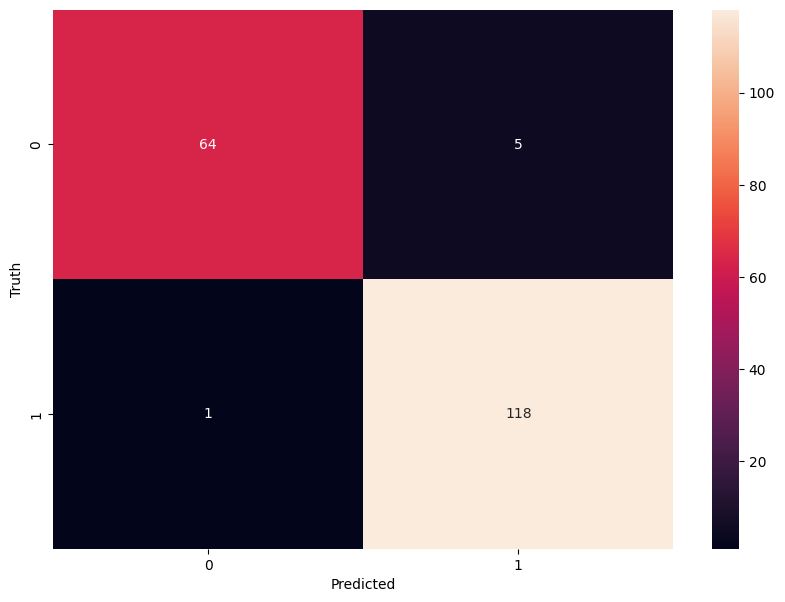

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = model_classification_2.predict(X_test)
y_pred = np.round(y_pred)

cm = confusion_matrix(y_test, y_pred)
cm

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# Saving and Loading the model

In [ ]:
model_classification_2.save('linear_regression.keras')
!ls -lh

total 284K
-rw-r--r-- 1 fpauli fpauli  32K Apr  4 18:08 DL00.h5
-rw-r--r-- 1 fpauli fpauli  31K Apr  5 10:45 DL00.keras
-rw-r--r-- 1 fpauli fpauli 182K Apr  4 19:00 DL00_classification.ipynb
-rw-r--r-- 1 fpauli fpauli 3.1K Mar 19 23:32 DL00_classification.py
-rw-r--r-- 1 fpauli fpauli  31K Apr  5 15:01 linear_regression.keras


In [ ]:
model = tf.keras.models.load_model('classification.keras')
print(model.layers)
model.evaluate(X_test, y_test)

OSError: No file or directory found at classification.keras